In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

W0621 07:21:21.206972 140685453670272 deprecation.py:323] From <ipython-input-2-25f3bfc0dcce>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0621 07:21:21.210634 140685453670272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0621 07:21:21.213303 140685453670272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0621 07:21:22.526354 140685453670272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0621 07:21:23.018203 140685453670272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


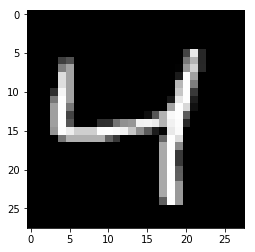

In [0]:
mnist=input_data.read_data_sets('MNIST_data',validation_size=0)
img=mnist.train.images[2]
plt.imshow(img.reshape((28,28)),cmap='gray')

In [0]:
learning_rate=0.001

inputs_= tf.placeholder(tf.float32,(None,28,28,1),name='inputs')
targets_ = tf.placeholder(tf.float32,(None,28,28,1),name='targets')

conv1=tf.layers.conv2d(inputs_,16,(3,3),padding='same',activation=tf.nn.relu)
maxpool1=tf.layers.max_pooling2d(conv1,(2,2),(2,2),padding='same')

conv2=tf.layers.conv2d(maxpool1,8,(3,3),padding='same',activation=tf.nn.relu)
maxpool2=tf.layers.max_pooling2d(conv2,(2,2),(2,2),padding='same')

conv3=tf.layers.conv2d(maxpool2,8,(3,3),padding='same',activation=tf.nn.relu)
encoded=tf.layers.max_pooling2d(conv3,(2,2),(2,2),padding='same')



upsample1=tf.image.resize_nearest_neighbor(encoded,(7,7))
conv4=tf.layers.conv2d(upsample1,8,(3,3),padding='same',activation=tf.nn.relu)

upsample2=tf.image.resize_nearest_neighbor(conv4,(14,14))
conv5=tf.layers.conv2d(upsample2,8,(3,3),padding='same',activation=tf.nn.relu)

upsample3=tf.image.resize_nearest_neighbor(conv5,(28,28))
conv6=tf.layers.conv2d(upsample3,16,(3,3),padding='same',activation=tf.nn.relu)

logits =tf.layers.conv2d(conv6,1,(3,3),padding='same',activation=None)
decoded=tf.nn.sigmoid(logits,name='decoded')

loss=tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_,logits=logits)
cost=tf.reduce_mean(loss)
opt=tf.train.AdamOptimizer(0.001).minimize(cost)

W0621 07:21:23.760857 140685453670272 deprecation.py:323] From <ipython-input-3-bf8b3c72696d>:6: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0621 07:21:23.771378 140685453670272 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0621 07:21:24.037610 140685453670272 deprecation.py:323] From <ipython-input-3-bf8b3c72696d>:7: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
W0621 07:21:24.314009 140685453670272 deprecation.py:323] Fro

In [0]:
sess = tf.Session()

In [0]:
epochs=20
batch_size=200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
  for ii in range(mnist.train.num_examples//batch_size):
    batch=mnist.train.next_batch(batch_size)
    imgs=batch[0].reshape((-1,28,28,1))
    batch_cost, _ =sess.run([cost,opt],feed_dict={inputs_:imgs, targets_:imgs})
    print("Epoch: {}/{}...".format(e+1, epochs),
          "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6897
Epoch: 1/20... Training loss: 0.6862
Epoch: 1/20... Training loss: 0.6816
Epoch: 1/20... Training loss: 0.6760
Epoch: 1/20... Training loss: 0.6696
Epoch: 1/20... Training loss: 0.6603
Epoch: 1/20... Training loss: 0.6504
Epoch: 1/20... Training loss: 0.6411
Epoch: 1/20... Training loss: 0.6262
Epoch: 1/20... Training loss: 0.6113
Epoch: 1/20... Training loss: 0.5917
Epoch: 1/20... Training loss: 0.5734
Epoch: 1/20... Training loss: 0.5569
Epoch: 1/20... Training loss: 0.5376
Epoch: 1/20... Training loss: 0.5203
Epoch: 1/20... Training loss: 0.5203
Epoch: 1/20... Training loss: 0.5156
Epoch: 1/20... Training loss: 0.5197
Epoch: 1/20... Training loss: 0.5112
Epoch: 1/20... Training loss: 0.5039
Epoch: 1/20... Training loss: 0.5075
Epoch: 1/20... Training loss: 0.4851
Epoch: 1/20... Training loss: 0.4678
Epoch: 1/20... Training loss: 0.4514
Epoch: 1/20... Training loss: 0.4414
Epoch: 1/20... Training loss: 0.4432
Epoch: 1/20... Training loss: 0.4329
E

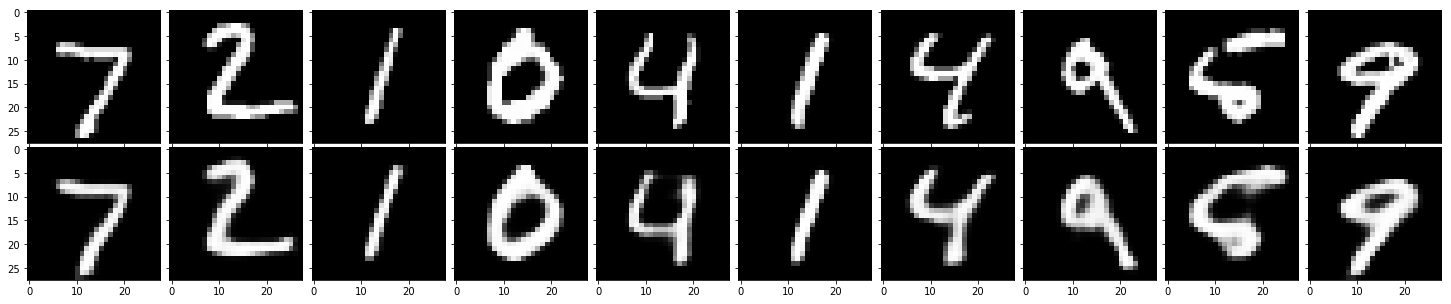

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(True)
        ax.get_yaxis().set_visible(True)


fig.tight_layout(pad=0.1)

In [0]:
sess.close()